In [1]:
import os
import pathlib
import sys
import socket

hostname = socket.gethostname()

abs_path = str(pathlib.Path(hostname).parent.absolute())
WORKDIR = abs_path[:- (len(abs_path.split('/')[-2] + abs_path.split('/')[-1])+1)]


if "mimi" in hostname:
    print(hostname)
    DATA_DIR = "/scratch/franzihe/"
    FIG_DIR = "/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/"
elif "glefsekaldt" in hostname: 
    DATA_DIR = "/home/franzihe/Data/"
    FIG_DIR = "/home/franzihe/Documents/Figures/CMIP6/"

INPUT_DATA_DIR = os.path.join(DATA_DIR, 'input')
OUTPUT_DATA_DIR = os.path.join(DATA_DIR, 'output')
UTILS_DIR = os.path.join(WORKDIR, 'utils')

sys.path.append(UTILS_DIR)
# make figure directory
try:
    os.mkdir(FIG_DIR)
except OSError:
    pass

mimi.uio.no


## Import python packages
- `Python` environment requirements: file [requirements_globalsnow.txt](../../requirements_globalsnow.txt) 
- load `python` packages from [imports.py](../../utils/imports.py)
- load `functions` from [functions.py](../../utils/functions.py)


In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
from imports import(pd, glob, np, plt, wget)


In [3]:
# reload imports
%load_ext autoreload
%autoreload 2

In [4]:
cmip_in = os.path.join(INPUT_DATA_DIR, 'cmip6_hist')
cmip_out = os.path.join(INPUT_DATA_DIR, 'cmip6_hist/daily_means')
# make output data directory
try:
    os.mkdir(cmip_out)
    os.mkdir(cmip_in)
except OSError:
    pass

In [5]:
da = pd.DataFrame()
for file in sorted(glob('{}/*clw_cli_clivi_lwp_tas_prsn*.json'.format(cmip_in))):
# for file in sorted(glob('esgf_search*')):
    print('reading file:', file)
    df = pd.read_json(file)
    
    _da = pd.DataFrame({'index': range(len(df['response']['docs']))}, columns=['index',
                        'activity_id',
                        'institution_id',
                        'source_id',
                        'xloc',
                        'experiment_id',
                        'member_id',
                        'yloc',
                        'table_id',
                        'variable_id',
                        'grid_label',
                        'version',
                        'data_node',
                        'directory_format_template_'])
    _da = _da.set_index('index')

    
    for i in range(len(df['response']['docs'])):
        _da['activity_id'][i]    = df['response']['docs'][i]['activity_id'][0]
        _da['institution_id'][i] = df['response']['docs'][i]['institution_id'][0]
        _da['source_id'][i]      = df['response']['docs'][i]['source_id'][0]
        _da['experiment_id'][i]  = df['response']['docs'][i]['experiment_id'][0]
        _da['member_id'][i]      = df['response']['docs'][i]['member_id'][0]
        _da['table_id'][i]       = df['response']['docs'][i]['table_id'][0]
        _da['variable_id'][i]    = df['response']['docs'][i]['variable_id'][0]
        _da['grid_label'][i]     = df['response']['docs'][i]['grid_label'][0]
        _da['version'][i]        = df['response']['docs'][i]['version']
        _da['data_node'][i]      = df['response']['docs'][i]['data_node']
        # _da['directory_format_template_'][i] = df['response']['docs'][i]['directory_format_template_']
       
        # 
    da = pd.concat([da, _da])

da.reset_index(inplace = True,drop=True)

reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_01.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_02.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_03.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_04.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_05.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_06.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_07.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_08.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn)_day_09.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_ta

In [6]:
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    for member in sorted(da['member_id'].unique()):        
        # remove models and ensemble member where no snow available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']).index
            da.drop(idx3, inplace=True)
        
        # remove models and ensemble member where no 2m temperature available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']).index
            da.drop(idx3, inplace=True)
        
        # remove models and ensemble member where no cloud liquid water available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']).index
            da.drop(idx3, inplace=True)


for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):      
    for member, k in zip(sorted(da['member_id'].unique()), range(len(sorted(da['member_id'].unique())))):
    #     (da.loc[da['member_id'] == member])['yloc'] = k 
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) >= 4:# and len((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']) != 0:
            idx2 = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da['yloc'][idx2] = k
        elif len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) <4:# and 
            idx2 = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da.drop(idx2, inplace=True)
    
    
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clw']).index
    da['xloc'][idx] = i
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'cli']).index
    da['xloc'][idx] = i+.2
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clivi']).index
    da['xloc'][idx] = i+.4
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'tas']).index
    da['xloc'][idx] = i+.6
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']).index
    da['xloc'][idx] = i+.8
    
da.reset_index(inplace = True,drop=True)



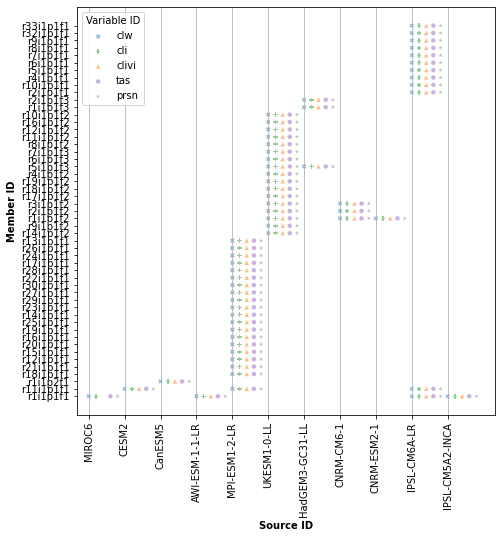

In [7]:
f, axsm = plt.subplots(1,1, figsize=[7.5, 7.5])

for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    
    if i == 0:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', c='tab:blue', label='clw', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', c='tab:green', label='cli', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', c='tab:orange', label='clivi', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', c='tab:purple', label='tas', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', c='tab:grey', label='prsn', alpha=0.5, edgecolors='none')
    
    
    else:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', c='tab:blue', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', c='tab:green', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', c='tab:orange', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', c='tab:purple', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', c='tab:grey', label='_nolegend_', alpha=0.5, edgecolors='none')


axsm.legend(labels=['clw', 'cli', 'clivi', 'tas', 'prsn'], loc=0, title='Variable ID', )
axsm.set_xticks(ticks=range(len(da['source_id'].unique())), labels=da['source_id'].unique(),rotation=90, fontsize=10)

# axsm.set_yticks(da['yloc'].unique(), labels=da['member_id'].unique(), fontsize=8)
axsm.grid(axis='x')
# Set common labels
axsm.set_xlabel('Source ID', fontweight='bold')
axsm.set_ylabel('Member ID', fontweight='bold');

plt.savefig(FIG_DIR + 'cmip6_model_variables.png', format = 'png', bbox_inches = 'tight', transparent = False)

In [13]:
for i in range(len(da)):
        
        # Download from
        # node = 'http://' + da['data_node'][i] + 'thredds/fileServer/esgC_dataroot/AR6/CMIP6/'
        node = 'http://' + da['data_node'][i] + '/thredds/fileServer/esgC_dataroot/CMIP6/'

        mdir =  da['activity_id'][i] + '/' + \
                da['institution_id'][i] + '/' + \
                da['source_id'][i] + '/' + \
                da['experiment_id'][i] + '/' + \
                da['member_id'][i] + '/' + \
                da['table_id'][i] + '/' + \
                da['variable_id'][i] + '/' + \
                da['grid_label'][i] + '/v' + \
                da['version'][i]

        # Download to
        file =  da['variable_id'][i] + '_' + \
                da['table_id'][i]    + '_' + \
                da['source_id'][i]   + '_' + \
                da['experiment_id'][i] + '_' + \
                da['member_id'][i] + '_' + \
                da['grid_label'][i] + '_20000101-20091231.nc'         


        dwf = node + mdir + '/' + file
        dwt = cmip_out + '/' + file

        print(dwf)
        print(dwt)
        # Download file
        wget.download(dwf, dwt)
        


http://esgf-data2.diasjp.net/thredds/fileServer/esgC_dataroot/CMIP6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/prsn/gn/v20191016/prsn_day_MIROC6_historical_r1i1p1f1_gn_20000101-20091231.nc
/scratch/franzihe/input/cmip6_hist/daily_means/prsn_day_MIROC6_historical_r1i1p1f1_gn_20000101-20091231.nc


HTTPError: HTTP Error 404: 404

In [ ]:
da.to_excel('{}/cmip6_model_variables.xlsx'.format(cmip_out), columns=['activity_id', 
                                                   'institution_id', 
                                                   'source_id',
                                                   'experiment_id',
                                                   'member_id',
                                                   'table_id',
                                                   'variable_id',
                                                   'grid_label',
                                                   'version'])